In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# import some data to play with
Company = pd.read_csv('Company_Data.csv',index_col=0)

In [3]:
Company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,,,,,,,,,,
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
Company['ShelveLoc']= label_encoder.fit_transform(Company['ShelveLoc']) 
Company['Urban']= label_encoder.fit_transform(Company['Urban']) 
Company['US']= label_encoder.fit_transform(Company['US']) 

In [5]:
x=Company.iloc[:,0:10]
y=Company['US']

In [6]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,,,,,,,,,,
9.50,138,73,11,276,120,0,42,17,1,1
11.22,111,48,16,260,83,1,65,10,1,1
10.06,113,35,10,269,80,2,59,12,1,1
7.40,117,100,4,466,97,2,55,14,1,1
4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
12.57,138,108,17,203,128,1,33,14,1,1
6.14,139,23,3,37,120,2,55,11,0,1
7.41,162,26,12,368,159,2,40,18,1,1


In [7]:
y

Sales
9.50     1
11.22    1
10.06    1
7.40     1
4.15     0
        ..
12.57    1
6.14     1
7.41     1
5.94     1
9.71     1
Name: US, Length: 400, dtype: int32

In [8]:
Company['ShelveLoc'].unique()
Company['Urban'].unique()
Company['US'].unique()

array([1, 0])

In [9]:
Company.ShelveLoc.value_counts()
Company.Urban.value_counts()
Company.US.value_counts()

1    258
0    142
Name: US, dtype: int64

In [10]:
colnames = list(Company.columns)
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [11]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [12]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

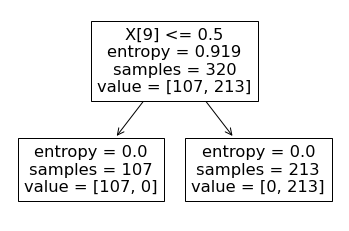

In [13]:
#PLot the decision tree
tree.plot_tree(model);


IndexError: list index out of range

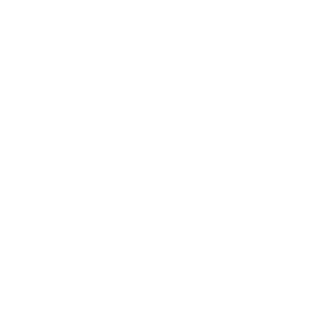

In [33]:
fn=['Sales (cm)','CompPrice (cm)','Income (cm)','Advertising (cm)','Population (cm)','Price (cm)','Age (cm)','Education (cm)']
cn=['ShelveLoc', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=100)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [15]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    45
0    35
dtype: int64

In [16]:
preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [17]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
US,,
0,35,0
1,0,45


In [18]:
# Accuracy 
np.mean(preds==y_test)

1.0

# Building Decision Tree Classifier (CART) using Gini Criteria

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [20]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

# Decision Tree Regression Example

In [22]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [23]:
array = Company.values
X = array[:,0:9]
y = array[:,9]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [25]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
#Find the accuracy
model.score(X_test,y_test)

0.13543859649122814